# Data Analysis Project
This notebook presents a data analysis workflow using Python libraries such as Pandas, Matplotlib, and Seaborn.<br> 
The goal is to explore and visualize insights from the dataset.

In [1]:
# Importing essential libraries for data manipulation and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
data = pd.read_csv("random_soil_data.csv")

# Display the first few rows
data.head()


,pH,Moisture (%),Bearing Capacity (kN/m²),Soil Type
0,5.32,15.72,168.01,Clay
1,6.99,36.19,270.02,Sandy
2,6.92,22.43,214.91,Loamy
3,7.03,33.58,433.20,Silty
4,5.73,21.91,344.60,Peaty


In [3]:
# Quick overview of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pH                        40000 non-null  float64
 1   Moisture (%)              40000 non-null  float64
 2   Bearing Capacity (kN/m²)  40000 non-null  float64
 3   Soil Type                 40000 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.2+ MB


In [10]:
data.isnull().sum()

pH                          0
Moisture (%)                0
Bearing Capacity (kN/m²)    0
Soil Type                   0
dtype: int64

## Visualize the percentage distribution of soil types using a pie chart.

<Axes: title={'center': 'Soil Type Distribution'}, ylabel='count'>

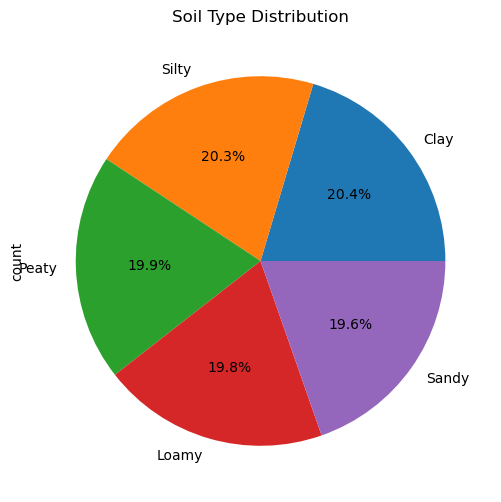

In [15]:
data['Soil Type'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 6), title="Soil Type Distribution")


## Plot the average pH level for each soil type using a bar chart.

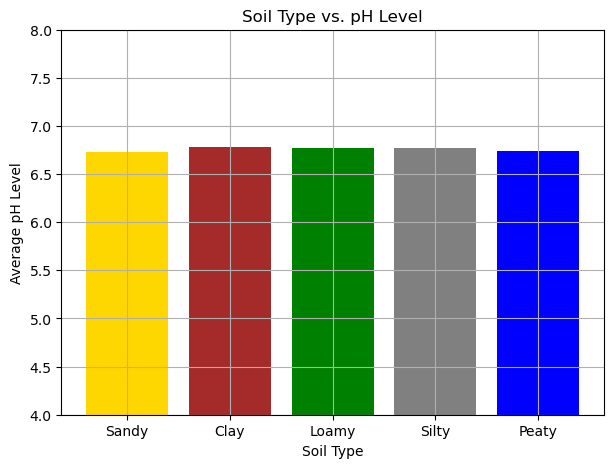

In [20]:
soil_types = ["Sandy", "Clay", "Loamy", "Silty", "Peaty"]
pH_levels = data.groupby('Soil Type')['pH'].mean().reindex(soil_types)

# Create Bar Chart
plt.figure(figsize=(7, 5))
plt.bar(soil_types, pH_levels, color=['gold', 'brown', 'green', 'gray', 'blue'])

# Labels and Title
plt.xlabel("Soil Type")
plt.ylabel("Average pH Level")
plt.title("Soil Type vs. pH Level")
plt.ylim(4, 8)  # Set y-axis range
plt.grid()
# Show plot
plt.show()


## Display the distribution and variation in moisture content across different soil types using a boxplot.

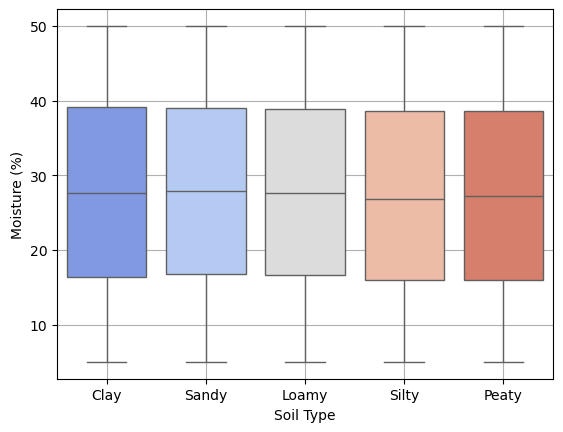

In [25]:
sns.boxplot(x="Soil Type", y="Moisture (%)", data=data, hue="Soil Type", palette="coolwarm", legend=False)
plt.grid()



## Check the unique soil types present in the dataset.

In [30]:
data["Soil Type"].unique()

array(['Clay', 'Sandy', 'Loamy', 'Silty', 'Peaty'], dtype=object)

In [32]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

In [42]:
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd

# Create the encoder
mlb = MultiLabelBinarizer()

# Get unique soil types as a list of lists
unique_soil_types = [[soil] for soil in data["Soil Type"].unique()]

# Encode them
encoded_soil = mlb.fit_transform(unique_soil_types)

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_soil, columns=mlb.classes_)

# Optional: Create a DataFrame with unique soil types to merge with encoded_df
soil_df = pd.DataFrame(data["Soil Type"].unique(), columns=["Soil Type"])

# Concatenate both
df_encoded = pd.concat([soil_df, encoded_df], axis=1)

# Show result
print(df_encoded)


  Soil Type  Clay  Loamy  Peaty  Sandy  Silty
0      Clay     1      0      0      0      0
1     Sandy     0      0      0      1      0
2     Loamy     0      1      0      0      0
3     Silty     0      0      0      0      1
4     Peaty     0      0      1      0      0
